# Problem Statement


  
  

#### Solving this assignment will give you an idea about how real business problems are solved usingEDA. In this case study, apart from applying the techniques you have learnt in EDA, you will alsodevelop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### >Import Libraries

In [1]:
#import usefull libraries like Pandas and Numpy to read csv-files
import pandas as pd
import numpy as np



### >Read Dataset

In [2]:
#Load Loan data file
loan_file = pd.read_csv('loan.csv')
loan_file

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

### > Delete unwanted columns

In [3]:
#Drop all column with null value

loan_new = loan_file.dropna(axis=1,how='all')
loan_new.shape

(39717, 57)

In [4]:
#Remove column with only one unique values
loan_new=loan_new.loc[:,loan_new.nunique()!=1]
loan_new.shape

(39717, 48)

In [5]:
# Drop columns with more than 50% null values

loan_new=loan_new.loc[:,round(loan_new.isnull().sum()/len(loan_new)*100,2)<50]
loan_new.shape

(39717, 45)

In [6]:
# As we only want to find out potential defaults, we should remove 'current' from loan status

loan_new=loan_new[loan_new.loan_status !='Current']
loan_new=loan_new.loc[:,loan_new.nunique()!=1]
loan_file

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#check datatypes
loan_new.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec             

### > Data Analysis

In [8]:
#To create Customer Behaviour Variable at the time of loan application
b_var =  [
 "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
b_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [9]:
# let's now remove the behaviour variables from analysis
df =loan_file.drop(b_var, axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 90 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null obj

In [10]:
# removing the columns having more than 90% missing values
missing_columns = loan_file.columns[100*(loan_file.isnull().sum()/len(loan_file.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [11]:
loan = loan_file.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [12]:
# summarise number of missing values again
Sumr=100*(loan.isnull().sum()/len(loan.index))
print(Sumr)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
# missing values in rows

loan_file.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
5        58
6        57
7        57
8        58
9        57
10       57
11       58
12       57
13       57
14       58
15       58
16       57
17       57
18       56
19       58
20       57
21       57
22       57
23       58
24       58
25       58
26       58
27       56
28       57
29       57
         ..
39687    59
39688    61
39689    59
39690    59
39691    59
39692    60
39693    59
39694    59
39695    59
39696    59
39697    59
39698    59
39699    59
39700    60
39701    59
39702    59
39703    59
39704    60
39705    59
39706    60
39707    59
39708    59
39709    60
39710    60
39711    59
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [15]:
 #we will not be able to use the variables zip code, address, state etc.
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [16]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [18]:
# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [19]:
# summarising the values
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

### > UNIVARIATE ANALYSIS 

In [20]:
# default rate
round(np.mean(df['loan_status']), 2)



0.15

In [21]:
# plotting graphs

import matplotlib.pyplot as plt
import seaborn as sns

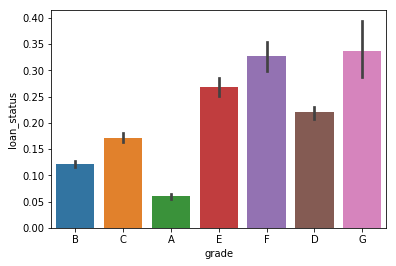

In [22]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [23]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

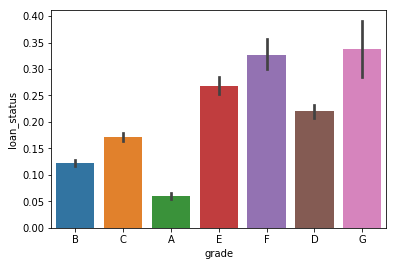

In [24]:
# compare default rates across grade of loan
#Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan.
plot_cat('grade')


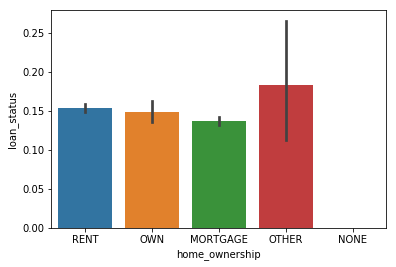

In [25]:
# home ownership: not a great discriminator
plot_cat('home_ownership')

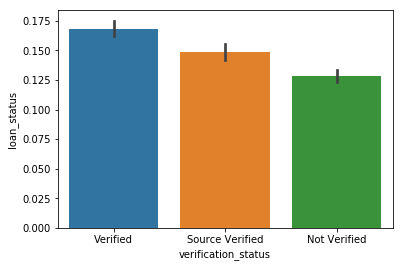

In [26]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plot_cat('verification_status')

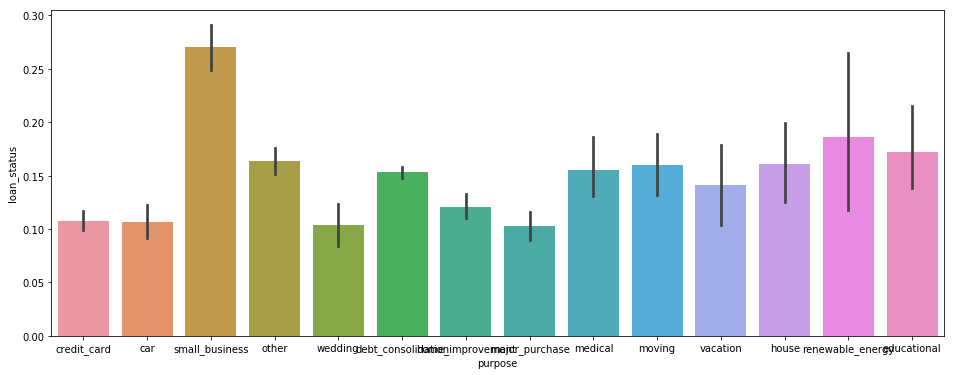

In [27]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plot_cat('purpose')

In [28]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [29]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

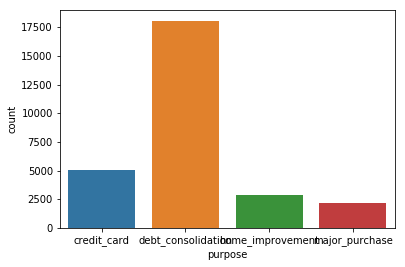

In [30]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

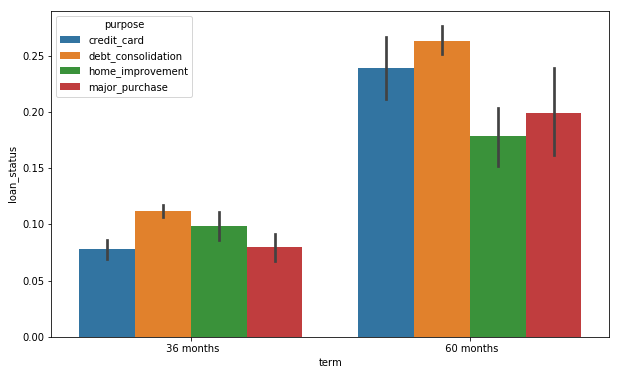

In [31]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

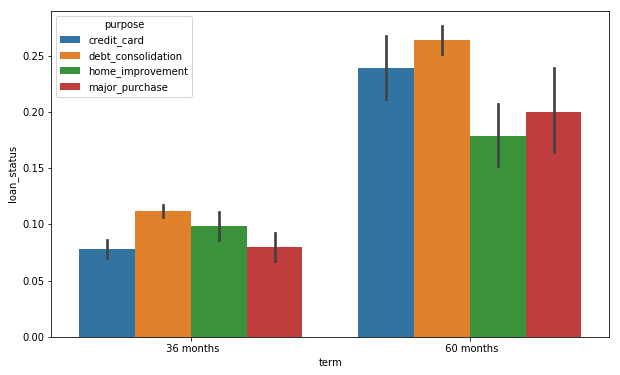

In [32]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

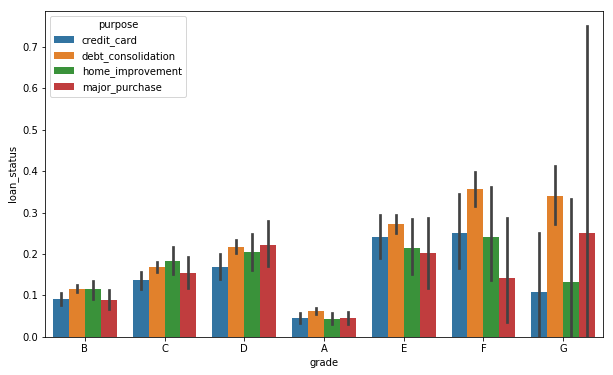

In [33]:
# grade of loan
plot_segmented('grade')

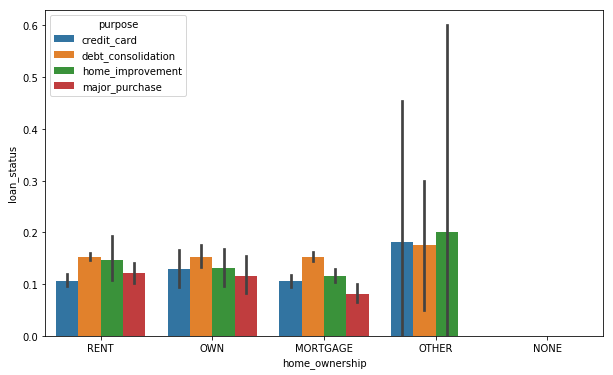

In [34]:
# home ownership
plot_segmented('home_ownership')

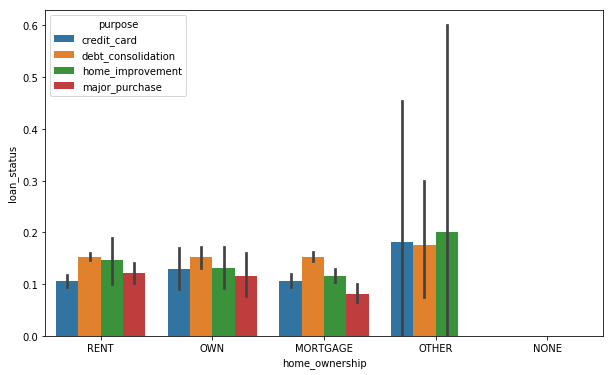

In [35]:
# home ownership
plot_segmented('home_ownership')

In [36]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
4080.00      1.0
31008.00     1.0
49580.00     1.0
30548.00     1.0
30660.00     1.0
30696.00     1.0
103050.00    1.0
49439.00     1.0
62550.00     1.0
30992.00     1.0
101837.28    1.0
31504.27     1.0
62664.00     1.0
101657.00    1.0
62695.00     1.0
62742.00     1.0
31323.00     1.0
31356.00     1.0
42480.00     1.0
100650.00    1.0
49590.00     1.0
104085.00    1.0
30480.00     1.0
49632.00     1.0
61700.00     1.0
29744.00     1.0
29784.00     1.0
29808.00     1.0
29856.00     1.0
29865.00     1.0
            ... 
70404.00     0.0
71219.20     0.0
71280.00     0.0
72204.00     0.0
71935.00     0.0
72194.00     0.0
72174.00     0.0
72150.00     0.0
72136.00     0.0
72100.00     0.0
72096.00     0.0
72072.00     0.0
72060.00     0.0
72054.00     0.0
71991.00     0.0
71964.00     0.0
71887.00     0.0
71352.00     0.0
71874.00     0.0
71820.00     0.0
71738.00     0.0
71711.00     0.0
71700.00     0.0
71688.00     0.0
71499.00     0.0
71496.00     0.0
71480.00     0.0
714

### > CoRelation Map

In [37]:
k =loan_new.select_dtypes(include=[np.number]).columns.size
correlation = loan_new.select_dtypes(include=[np.number]).corr()
correlation

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.993534,0.120614,0.131283,0.231603,0.076088,0.005572,0.091785,-0.008417,-0.041021,...,0.039902,0.110432,0.194832,0.092979,0.123268,-0.055789,0.038686,-0.010916,0.142251,-0.007997
member_id,0.993534,1.000000,0.120393,0.130307,0.241324,0.070918,0.006442,0.092910,-0.007905,-0.045879,...,0.042217,0.111810,0.205195,0.093773,0.126660,-0.058497,0.036526,-0.012831,0.142582,-0.007346
loan_amnt,0.120614,0.120393,1.000000,0.981790,0.937922,0.932260,0.268999,0.062436,-0.031951,0.012940,...,0.256179,0.881910,0.847635,0.845870,0.728343,0.047103,0.142789,0.077005,0.474614,-0.035981
funded_amnt,0.131283,0.130307,0.981790,1.000000,0.956172,0.958035,0.264798,0.062194,-0.031866,0.012857,...,0.250551,0.898709,0.864501,0.864082,0.736654,0.049465,0.143452,0.078769,0.478448,-0.036995
funded_amnt_inv,0.231603,0.241324,0.937922,0.956172,1.000000,0.905464,0.251981,0.070663,-0.038171,-0.002800,...,0.242715,0.874730,0.909127,0.838587,0.726736,0.029379,0.130997,0.064282,0.469166,-0.041193
installment,0.076088,0.070918,0.932260,0.958035,0.905464,1.000000,0.267842,0.052038,-0.019755,0.011014,...,0.229860,0.858493,0.817665,0.847762,0.642655,0.058387,0.121463,0.077519,0.413588,-0.033361
annual_inc,0.005572,0.006442,0.268999,0.264798,0.251981,0.267842,1.000000,-0.121530,0.022229,0.035465,...,0.234534,0.256313,0.245198,0.256848,0.185056,0.006814,0.022184,0.015981,0.143242,-0.016224
dti,0.091785,0.092910,0.062436,0.062194,0.070663,0.052038,-0.121530,1.000000,-0.033347,0.002178,...,0.229119,0.059274,0.066277,0.036755,0.103104,-0.011412,0.026162,0.011744,0.008566,0.005966
delinq_2yrs,-0.008417,-0.007905,-0.031951,-0.031866,-0.038171,-0.019755,0.022229,-0.033347,1.000000,0.008733,...,0.066994,-0.023130,-0.029608,-0.038447,0.023778,0.028772,0.012443,0.014077,-0.012511,0.003404
inq_last_6mths,-0.041021,-0.045879,0.012940,0.012857,-0.002800,0.011014,0.035465,0.002178,0.008733,1.000000,...,0.113516,-0.008244,-0.018589,-0.021328,0.026549,0.030741,0.018899,0.012388,0.027772,0.015517
